## Creating the dataset

In [127]:
# Importing necessary packages

from random import choices, shuffle, seed
import matplotlib.pyplot as plt
import utils as ut

# Setting random seeds for reproducibility
seed(42)

We would like to build an appropriately sized dataset on which to train and test our models. As random generation of sequences would result in an extremely small number of correct sequences, we will use our ```SampleCorrect()``` utility function to unbias the dataset and allow the model to see a sufficient number of both postive and negative examples.

It is interesting to look at the distribution of sequence lenghts generated by SampleCorrect. As expected, there are more sequences of larger sequence lenght. This is due to combinatorial reasons - note that for example there is only 4 possibilities for n=2 (if we have 4 types of brackets), but the number grows exponentially with n.

In [ ]:
plt.hist(RealLen(list(SampleCorrect(300))), bins = [1, 3, 5, 7, 9, 11], rwidth=0.8);
plt.title('Distribution of sequence lengts (total: 300)');
plt.xlabel('Sequence lenght');
plt.ylabel('# of occurences');

The large number for n=6 is likely some artefact of the way I sample the sequences. At any rate, the distribution looks much more exponential when we generate a larger amount of sequences (as we will for the dataset). Note the use of a log scale (and feel free to toggle it):

In [ ]:
plt.hist(RealLen(list(SampleCorrect(2000))), bins = [1, 3, 5, 7, 9, 11], rwidth=0.8);
plt.title('Distribution of sequence lengts (total:2000)');
plt.yscale('log')
plt.xlabel('Sequence lenght');
plt.ylabel('log # of occurences');

In [97]:
# Creating a dataset of 10-character sequences

chars = {'(', ')', '[', ']', '{', '}', '<', '>'}
MAX_LEN = 10

# 10000 correct examples
correct = SampleCorrect(10000, MAX_LEN=MAX_LEN)

In [98]:
# 2^12 = 4096 correctly padded random examples; 
# we expect a small amount of duplicates, 
# and a neglible number (if any) of correct sequences
rand = []
# Iterating over possible sequence lenghts
for k in range(MAX_LEN+1):
    # exponential term ensures we generate more of the longer sequences
    while(len(rand)<2**(k+2)): 
        # Rndomly sampling, padding, and appending
        seq = ''.join(choices(list(chars), k=k))
        rand.append(seq + (MAX_LEN - k)*'.')

In [99]:
# 6000 purely random sequences
chars.add('.')
for i in range(6000):
    seq = ''.join(choices(list(chars), k=MAX_LEN))
    rand.append(seq)

In [107]:
# Combining and labeling
Dataset = list(correct.union(set(rand)))
shuffle(Dataset)
Labels = [int(IsValid(seq)) for seq in Dataset]

print(f'We have created a dataset of {len(Dataset)} sequences, {sum(Labels)} of which are correct.')
Dataset[:10]

We have created a dataset of 20090 sequences, 10000 of which are correct.


['<()()>{{}}',
 '({}<>)<><>',
 '({}<[{}]>)',
 '[(>{)>]>)>',
 '()<{}<>>..',
 ')(>>.[.}(}',
 '[[]<>{}][]',
 '(())[<>{}]',
 '{}{}()[()]',
 ')()}{[.]>)']

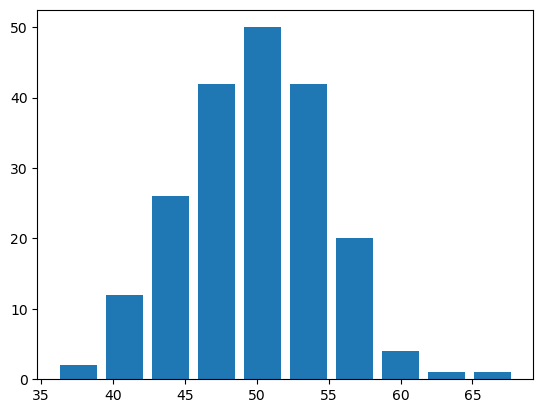

In [113]:
plt.hist([sum(Labels[100*i:100*(i+1)]) for i in range(200)], bins = 10, rwidth=0.8);

In [115]:
with open('test1.txt', 'w') as file:
    for seq in Dataset[:50]:
        file.write(seq + '\n')

In [ ]:
seqs=[]
with open('test1.txt', 'r') as file:
    while True:
        seq = file.readline()
        if not seq:
            break
        seqs.append(seq.strip())
seqs


In [1]:
a = ut.ReadDataset('test1.txt')

NameError: name 'ut' is not defined